In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.ticker import ScalarFormatter

In [2]:
colors = ['#F7941D', '#00b9f2', '#F7941D', '#00b9f2', '#F7941D', '#00b9f2']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

In [3]:
cdr3_df = pd.read_csv('../raw_data/cdr3_perSample_clean.zip')
cdr3_df.head()

,sample,site,tissue,type,cdr3
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF


In [20]:
meta_df = pd.read_csv('../raw_data/perSample_allChains_aditionalPhenotypes.csv')
meta_df = meta_df.loc[:, ['File_Name', 'submitted_subject_id_s']]
meta_df = meta_df.rename(columns={'File_Name': 'sample', 'submitted_subject_id_s': 'subject'})
meta_df.head()

,sample,subject
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC
1,G64389.GTEX-13SLW-0326.1,GTEX-13SLW
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,GTEX-OXRK
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,GTEX-T2IS


In [5]:
full_df = pd.merge(cdr3_df, meta_df, on = 'sample')
full_df.head()

,sample,site,tissue,type,cdr3,subject
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC


In [6]:
u_subsite = full_df.drop_duplicates(['subject', 'site']).loc[:,['site', 'subject', 'sample']].reset_index(drop=True)
u_subsite['same'] = 1
u_subsite

,site,subject,sample,same
0,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1
1,Muscle - Skeletal,GTEX-13SLW,G64389.GTEX-13SLW-0326.1,1
2,Lung,GTEX-SIU7,G26533.GTEX-SIU7-0526-SM-3NM8I.1,1
3,Artery - Tibial,GTEX-OXRK,G18060.GTEX-OXRK-0526-SM-2YUMW.1,1
4,Brain - Caudate (basal ganglia),GTEX-T2IS,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,1
5,Artery - Aorta,GTEX-R55D,G23375.GTEX-R55D-1026-SM-3GAEQ.1,1
6,Esophagus - Mucosa,GTEX-Y8E4,G61792.GTEX-Y8E4-1726.2,1
7,Skin - Sun Exposed (Lower leg),GTEX-13OW7,G62160.GTEX-13OW7-0126.2,1
8,Brain - Cerebellum,GTEX-P44H,G19453.GTEX-P44H-2426-SM-2XCEJ.2,1
9,Whole Blood,GTEX-1211K,G62070.GTEX-1211K-0006.2,1


In [7]:
u_test = pd.merge(u_subsite, u_subsite, on = 'same')
u_test = u_test.loc[u_test['site_x'] != u_test['site_y'], :]
u_test['sample_pair'] = u_test.apply(lambda row: ';'.join(sorted([row['sample_x'], row['sample_y']])), axis=1)
u_test = u_test.drop_duplicates('sample_pair')
u_test['tissue_pair'] = u_test.apply(lambda row: ';'.join(sorted([row['site_x'], row['site_y']])), axis=1)
u_test.head()

,site_x,subject_x,sample_x,same,site_y,subject_y,sample_y,sample_pair,tissue_pair
1,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1,Muscle - Skeletal,GTEX-13SLW,G64389.GTEX-13SLW-0326.1,G35168.GTEX-SNMC-0826-SM-4DM66.1;G64389.GTEX-1...,Bladder;Muscle - Skeletal
2,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1,Lung,GTEX-SIU7,G26533.GTEX-SIU7-0526-SM-3NM8I.1,G26533.GTEX-SIU7-0526-SM-3NM8I.1;G35168.GTEX-S...,Bladder;Lung
3,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1,Artery - Tibial,GTEX-OXRK,G18060.GTEX-OXRK-0526-SM-2YUMW.1,G18060.GTEX-OXRK-0526-SM-2YUMW.1;G35168.GTEX-S...,Artery - Tibial;Bladder
4,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1,Brain - Caudate (basal ganglia),GTEX-T2IS,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1;G35168.GT...,Bladder;Brain - Caudate (basal ganglia)
5,Bladder,GTEX-SNMC,G35168.GTEX-SNMC-0826-SM-4DM66.1,1,Artery - Aorta,GTEX-R55D,G23375.GTEX-R55D-1026-SM-3GAEQ.1,G23375.GTEX-R55D-1026-SM-3GAEQ.1;G35168.GTEX-S...,Artery - Aorta;Bladder


In [8]:
len(u_test)

16562600

In [9]:
u_count = u_test.groupby('tissue_pair')['sample_pair'].count().reset_index()
u_count

,tissue_pair,sample_pair
0,Adipose - Subcutaneous;Adipose - Visceral (Ome...,29000
1,Adipose - Subcutaneous;Adrenal Gland,25752
2,Adipose - Subcutaneous;Artery - Aorta,40832
3,Adipose - Subcutaneous;Artery - Coronary,20648
4,Adipose - Subcutaneous;Artery - Tibial,45704
5,Adipose - Subcutaneous;Bladder,2552
6,Adipose - Subcutaneous;Brain - Amygdala,13224
7,Adipose - Subcutaneous;Brain - Anterior cingul...,12992
8,Adipose - Subcutaneous;Brain - Caudate (basal ...,17400
9,Adipose - Subcutaneous;Brain - Cerebellar Hemi...,16008


In [16]:
df_igh = full_df.loc[full_df['type'] == 'IGH', :]
df_igh.head()

,sample,site,tissue,type,cdr3,subject
17,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CARLPAYINYAVDVW,GTEX-SIU7
18,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CAKGTAAAPTPPDHW,GTEX-SIU7
19,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CRTMGAPRESYFDVW,GTEX-SIU7
20,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CATEWENEHFYFDYW,GTEX-SIU7
21,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CASSLYDLRNWFGPW,GTEX-SIU7


In [17]:
df_igk = full_df.loc[full_df['type'] == 'IGK', :]
df_igk.head()

,sample,site,tissue,type,cdr3,subject
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC


In [18]:
df_igl = full_df.loc[full_df['type'] == 'IGL', :]
df_igl.head()

,sample,site,tissue,type,cdr3,subject
6,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGL,CVLYMGSGISVF,GTEX-SNMC
7,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGL,CCSYAGDGTYVF,GTEX-SNMC
8,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGL,CCSYAGPYTFVF,GTEX-SNMC
677,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGL,CAAWDNTLRGVF,GTEX-SIU7
678,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGL,CCSYEGSNTLVF,GTEX-SIU7


In [9]:
igh_samples = df_igh['sample'].drop_duplicates().tolist()
igh_samples[0:5]

['G26533.GTEX-SIU7-0526-SM-3NM8I.1',
 'G23375.GTEX-R55D-1026-SM-3GAEQ.1',
 'G61792.GTEX-Y8E4-1726.2',
 'G19453.GTEX-P44H-2426-SM-2XCEJ.2',
 'G62070.GTEX-1211K-0006.2']

In [10]:
igk_samples = df_igk['sample'].drop_duplicates().tolist()
igk_samples[0:5]

['G35168.GTEX-SNMC-0826-SM-4DM66.1',
 'G64389.GTEX-13SLW-0326.1',
 'G26533.GTEX-SIU7-0526-SM-3NM8I.1',
 'G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1',
 'G23375.GTEX-R55D-1026-SM-3GAEQ.1']

In [11]:
igl_samples = df_igl['sample'].drop_duplicates().tolist()
igl_samples[0:5]

['G35168.GTEX-SNMC-0826-SM-4DM66.1',
 'G26533.GTEX-SIU7-0526-SM-3NM8I.1',
 'G18060.GTEX-OXRK-0526-SM-2YUMW.1',
 'G23375.GTEX-R55D-1026-SM-3GAEQ.1',
 'G61792.GTEX-Y8E4-1726.2']

In [19]:
igh_out = pd.merge(df_igh, df_igh, on = 'cdr3')
igh_out = igh_out.loc[igh_out['site_x'] != igh_out['site_y'], :]
igh_out['check_string'] = igh_out.apply(lambda row: ''.join(sorted([row['sample_x'], row['sample_y']])), axis=1)
igh_out['tissue_pair'] = igh_out.apply(lambda row: ','.join(sorted([row['site_x'], row['site_y']])), axis=1)
igh_out = igh_out.drop_duplicates(['check_string', 'cdr3'])
igh_out.head()

,sample_x,site_x,tissue_x,type_x,cdr3,subject_x,sample_y,site_y,tissue_y,type_y,subject_y,check_string,tissue_pair
16,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CARHGRTGDSAFDHW,GTEX-SIU7,G34673.GTEX-SIU7-0226-SM-4BRX2.1,Artery - Coronary,Blood Vessel,IGH,GTEX-SIU7,G26533.GTEX-SIU7-0526-SM-3NM8I.1G34673.GTEX-SI...,"Artery - Coronary,Lung"
36,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CARGQLRDLHGFDYW,GTEX-SIU7,G34673.GTEX-SIU7-0226-SM-4BRX2.1,Artery - Coronary,Blood Vessel,IGH,GTEX-SIU7,G26533.GTEX-SIU7-0526-SM-3NM8I.1G34673.GTEX-SI...,"Artery - Coronary,Lung"
37,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CARGQLRDLHGFDYW,GTEX-SIU7,G34683.GTEX-SIU7-1426-SM-4BRWT.1,Stomach,Stomach,IGH,GTEX-SIU7,G26533.GTEX-SIU7-0526-SM-3NM8I.1G34683.GTEX-SI...,"Lung,Stomach"
40,G34673.GTEX-SIU7-0226-SM-4BRX2.1,Artery - Coronary,Blood Vessel,IGH,CARGQLRDLHGFDYW,GTEX-SIU7,G34683.GTEX-SIU7-1426-SM-4BRWT.1,Stomach,Stomach,IGH,GTEX-SIU7,G34673.GTEX-SIU7-0226-SM-4BRX2.1G34683.GTEX-SI...,"Artery - Coronary,Stomach"
61,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,IGH,CARGSNTLTRHFDYW,GTEX-SIU7,G60672.GTEX-13D11-0826.2,Colon - Transverse,Colon,IGH,GTEX-13D11,G26533.GTEX-SIU7-0526-SM-3NM8I.1G60672.GTEX-13...,"Colon - Transverse,Lung"


In [20]:
igh_same = igh_out.loc[igh_out['subject_x'] == igh_out['subject_y'], :]
igh_same_summ = igh_same.groupby('tissue_pair').count()['check_string'].reset_index()
igh_same_summ = igh_same_summ.rename(columns={'check_string': 'igh_same_ind'})
igh_same_summ.head()

,tissue_pair,igh_same_ind
0,"Adipose - Subcutaneous,Adipose - Visceral (Ome...",2
1,"Adipose - Subcutaneous,Artery - Aorta",2
2,"Adipose - Subcutaneous,Artery - Coronary",1
3,"Adipose - Subcutaneous,Artery - Tibial",3
4,"Adipose - Subcutaneous,Brain - Hypothalamus",1


In [21]:
igh_diff = igh_out.loc[igh_out['subject_x'] != igh_out['subject_y'], :]
igh_diff_summ = igh_diff.groupby('tissue_pair').count()['check_string'].reset_index()
igh_diff_summ = igh_diff_summ.rename(columns={'check_string': 'igh_diff_ind'})
igh_diff_summ.head()

,tissue_pair,igh_diff_ind
0,"Adipose - Subcutaneous,Adipose - Visceral (Ome...",11
1,"Adipose - Subcutaneous,Artery - Aorta",5
2,"Adipose - Subcutaneous,Artery - Tibial",6
3,"Adipose - Subcutaneous,Brain - Amygdala",1
4,"Adipose - Subcutaneous,Brain - Cortex",1


In [24]:
print(len(igh_same))
print(len(igh_diff))

10966
5842


In [ ]:
igk_out = pd.merge(df_igk, df_igk, on = 'cdr3')
igk_out = igk_out.loc[igk_out['site_x'] != igk_out['site_y'], :]
igk_out['check_string'] = igk_out.apply(lambda row: ''.join(sorted([row['sample_x'], row['sample_y']])), axis=1)
igk_out['tissue_pair'] = igk_out.apply(lambda row: ','.join(sorted([row['site_x'], row['site_y']])), axis=1)
igk_out = igk_out.drop_duplicates(['check_string', 'cdr3'])
igk_out.head()

In [ ]:
igk_same = igk_out.loc[igk_out['subject_x'] == igk_out['subject_y'], :]
igk_same_summ = igk_same.groupby('tissue_pair').count()['check_string'].reset_index()
igk_same_summ = igk_same_summ.rename(columns={'check_string': 'igk_same_ind'})
igk_same_summ.head()

In [ ]:
igk_diff = igk_out.loc[igk_out['subject_x'] != igk_out['subject_y'], :]
igk_diff_summ = igk_diff.groupby('tissue_pair').count()['check_string'].reset_index()
igk_diff_summ = igk_diff_summ.rename(columns={'check_string': 'igk_diff_ind'})
igk_diff_summ.head()

In [10]:
igl_out = pd.merge(df_igl, df_igl, on = 'cdr3')
igl_out = igl_out.loc[igl_out['site_x'] != igl_out['site_y'], :]
igl_out['check_string'] = igl_out.apply(lambda row: ''.join(sorted([row['sample_x'], row['sample_y']])), axis=1)
igl_out['tissue_pair'] = igl_out.apply(lambda row: ','.join(sorted([row['site_x'], row['site_y']])), axis=1)
igl_out = igl_out.drop_duplicates(['check_string', 'cdr3'])
igl_out.head()


NameError: name 'df_igl' is not defined

In [ ]:
igl_same = igl_out.loc[igl_out['subject_x'] == igl_out['subject_y'], :]
igl_same_summ = igl_same.groupby('tissue_pair').count()['check_string'].reset_index()
igl_same_summ = igl_same_summ.rename(columns={'check_string': 'igl_same_ind'})
igl_same_summ.head()

In [ ]:
igl_diff = igl_out.loc[igl_out['subject_x'] != igl_out['subject_y'], :]
igl_diff_summ = igl_diff.groupby('tissue_pair').count()['check_string'].reset_index()
igl_diff_summ = igl_diff_summ.rename(columns={'check_string': 'igl_diff_ind'})
igl_diff_summ.head()

In [ ]:
df_final = pd.merge(igh_same, igh_diff, on = 'tissue_pair', how='outer')
df_final = pd.merge(df_final, igk_same, on = 'tissue_pair', how='left')
df_final = pd.merge(df_final, igk_diff, on = 'tissue_pair', how='left')
df_final = pd.merge(df_final, igl_same, on = 'tissue_pair', how='left')
df_final = pd.merge(df_final, igl_diff, on = 'tissue_pair', how='left')

df_final.to_csv(path_or_buf='../summary_data/Figure5a_data.csv')

In [4]:
igh_check = pd.read_csv('../summary_data/igh_s_final.csv')
igh_check.head()

,sample_pair,igh_same_ind_cdr3,igh_diff_ind_cdr3
0,G16549.GTEX-OXRK-0626.2;G25872.GTEX-OXRK-1726-...,10.0,NaN
1,G16549.GTEX-OXRK-0626.2;G25873.GTEX-OXRK-1626-...,1.0,NaN
2,G16554.GTEX-OHPL-2626.2;G25682.GTEX-OHPL-1026-...,5.0,NaN
3,G16554.GTEX-OHPL-2626.2;G25683.GTEX-OHPL-0626-...,1.0,NaN
4,G16554.GTEX-OHPL-2626.2;G25692.GTEX-OHPL-3026-...,1.0,NaN


In [3]:
igh_check = pd.read_csv('../summary_data/igh_s_final.csv')
igh_control = pd.read_csv('../summary_data/igh_cdr3.csv')
igh_cdr3 = igh_control.groupby('sample')['cdr3'].count().reset_index()
igh_check['t0'] = igh_check['sample_pair'].str.split(';').apply(lambda x: x[0])
igh_check['t1'] = igh_check['sample_pair'].str.split(';').apply(lambda x: x[1])
igh_both = pd.merge(igh_check, igh_cdr3, left_on = 't0', right_on = 'sample')
igh_both = igh_both.rename(columns={'cdr3': 't0_count'})
igh_both = pd.merge(igh_both, igh_cdr3, left_on = 't1', right_on = 'sample')
igh_both = igh_both.rename(columns={'cdr3': 't1_count'})
#igh_both['t_total'] = igh_both['t0_count'] + igh_both['t1_count']
igh_both = igh_both.loc[igh_both['t0_count'] >= 10, :]
igh_both = igh_both.loc[igh_both['t1_count'] >= 10, :]
igh_both['igh_beta_same'] = (2*igh_both['igh_same_ind_cdr3'])/(igh_both['t0_count'] + igh_both['t1_count'])
igh_both['igh_beta_diff'] = (2*igh_both['igh_diff_ind_cdr3'])/(igh_both['t0_count'] + igh_both['t1_count'])
igh_both.head()

,sample_pair,igh_same_ind_cdr3,igh_diff_ind_cdr3,t0,t1,sample_x,t0_count,sample_y,t1_count,igh_beta_same,igh_beta_diff
0,G16549.GTEX-OXRK-0626.2;G25872.GTEX-OXRK-1726-...,10.0,NaN,G16549.GTEX-OXRK-0626.2,G25872.GTEX-OXRK-1726-SM-3NB16.2,G16549.GTEX-OXRK-0626.2,72,G25872.GTEX-OXRK-1726-SM-3NB16.2,836,0.022026,NaN
1,G16613.GTEX-OXRK-0006.3;G25872.GTEX-OXRK-1726-...,1.0,NaN,G16613.GTEX-OXRK-0006.3,G25872.GTEX-OXRK-1726-SM-3NB16.2,G16613.GTEX-OXRK-0006.3,35,G25872.GTEX-OXRK-1726-SM-3NB16.2,836,0.002296,NaN
2,G25693.GTEX-OHPL-2526-SM-3MJGT.1;G25872.GTEX-O...,NaN,1.0,G25693.GTEX-OHPL-2526-SM-3MJGT.1,G25872.GTEX-OXRK-1726-SM-3NB16.2,G25693.GTEX-OHPL-2526-SM-3MJGT.1,318,G25872.GTEX-OXRK-1726-SM-3NB16.2,836,NaN,0.001733
3,G25664.GTEX-WRHU-0326-SM-3MJFY.1;G25872.GTEX-O...,NaN,1.0,G25664.GTEX-WRHU-0326-SM-3MJFY.1,G25872.GTEX-OXRK-1726-SM-3NB16.2,G25664.GTEX-WRHU-0326-SM-3MJFY.1,155,G25872.GTEX-OXRK-1726-SM-3NB16.2,836,NaN,0.002018
4,G16549.GTEX-OXRK-0626.2;G25873.GTEX-OXRK-1626-...,1.0,NaN,G16549.GTEX-OXRK-0626.2,G25873.GTEX-OXRK-1626-SM-3NB17.2,G16549.GTEX-OXRK-0626.2,72,G25873.GTEX-OXRK-1626-SM-3NB17.2,176,0.008065,NaN


In [4]:
igh_same = igh_both.loc[:,['sample_pair', 'igh_beta_same']].dropna().reset_index(drop=True)
igh_same = igh_same.rename(columns={'igh_beta_same': 'beta_diversity'})
igh_same['chain'] = 'igh_same'
print(len(igh_same))

1542


In [5]:
igh_diff = igh_both.loc[:,['sample_pair', 'igh_beta_diff']].dropna().reset_index(drop=True)
igh_diff = igh_diff.rename(columns={'igh_beta_diff': 'beta_diversity'})
igh_diff['chain'] = 'igh_diff'
print(len(igh_diff))

2988


In [6]:
igl_check = pd.read_csv('../summary_data/igl_s_final.csv')
igl_control = pd.read_csv('../summary_data/igl_cdr3.csv')
#igl_check['sample_pair'] = igl_check['sample_pair'].str.replace(',', ';')
igl_cdr3 = igl_control.groupby('sample')['cdr3'].count().reset_index()
igl_check['t0'] = igl_check['sample_pair'].str.split(';').apply(lambda x: x[0])
igl_check['t1'] = igl_check['sample_pair'].str.split(';').apply(lambda x: x[1])
igl_both = pd.merge(igl_check, igl_cdr3, left_on = 't0', right_on = 'sample')
igl_both = igl_both.rename(columns={'cdr3': 't0_count'})
igl_both = pd.merge(igl_both, igl_cdr3, left_on = 't1', right_on = 'sample')
igl_both = igl_both.rename(columns={'cdr3': 't1_count'})
#igl_both['t_total'] = igl_both['t0_count'] + igl_both['t1_count']
igl_both = igl_both.loc[igl_both['t0_count'] >= 10, :]
igl_both = igl_both.loc[igl_both['t1_count'] >= 10, :]
igl_both['igl_beta_same'] = (2*igl_both['igl_same_ind_cdr3'])/(igl_both['t0_count'] + igl_both['t1_count'])
igl_both['igl_beta_diff'] = (2*igl_both['igl_diff_ind_cdr3'])/(igl_both['t0_count'] + igl_both['t1_count'])
igl_both.head()


,sample_pair,igl_same_ind_cdr3,igl_diff_ind_cdr3,t0,t1,sample_x,t0_count,sample_y,t1_count,igl_beta_same,igl_beta_diff
2,G16549.GTEX-OXRK-0626.2;G33863.GTEX-OIZH-0926-...,NaN,29.0,G16549.GTEX-OXRK-0626.2,G33863.GTEX-OIZH-0926-SM-48TBR.1,G16549.GTEX-OXRK-0626.2,168,G33863.GTEX-OIZH-0926-SM-48TBR.1,1781,NaN,0.029759
4,G16554.GTEX-OHPL-2626.2;G33863.GTEX-OIZH-0926-...,NaN,101.0,G16554.GTEX-OHPL-2626.2,G33863.GTEX-OIZH-0926-SM-48TBR.1,G16554.GTEX-OHPL-2626.2,1010,G33863.GTEX-OIZH-0926-SM-48TBR.1,1781,NaN,0.072375
5,G16555.GTEX-OHPK-0526.3;G33863.GTEX-OIZH-0926-...,NaN,8.0,G16555.GTEX-OHPK-0526.3,G33863.GTEX-OIZH-0926-SM-48TBR.1,G16555.GTEX-OHPK-0526.3,81,G33863.GTEX-OIZH-0926-SM-48TBR.1,1781,NaN,0.008593
7,G16565.GTEX-OIZH-2626.3;G33863.GTEX-OIZH-0926-...,7.0,NaN,G16565.GTEX-OIZH-2626.3,G33863.GTEX-OIZH-0926-SM-48TBR.1,G16565.GTEX-OIZH-2626.3,24,G33863.GTEX-OIZH-0926-SM-48TBR.1,1781,0.007756,NaN
8,G16570.GTEX-OHPJ-0526.3;G33863.GTEX-OIZH-0926-...,NaN,25.0,G16570.GTEX-OHPJ-0526.3,G33863.GTEX-OIZH-0926-SM-48TBR.1,G16570.GTEX-OHPJ-0526.3,207,G33863.GTEX-OIZH-0926-SM-48TBR.1,1781,NaN,0.025151


In [7]:
igl_same = igl_both.loc[:,['sample_pair', 'igl_beta_same']].dropna().reset_index(drop=True)
igl_same = igl_same.rename(columns={'igl_beta_same': 'beta_diversity'})
igl_same['chain'] = 'igl_same'
print(len(igl_same))

5124


In [8]:
igl_diff = igl_both.loc[:,['sample_pair', 'igl_beta_diff']].dropna().reset_index(drop=True)
igl_diff = igl_diff.rename(columns={'igl_beta_diff': 'beta_diversity'})
igl_diff['chain'] = 'igl_diff'
print(len(igl_diff))

1484735


In [9]:
igk_check = pd.read_csv('../summary_data/igk_s_final.csv')
igk_control = pd.read_csv('../summary_data/igk_cdr3.csv')
igk_cdr3 = igk_control.groupby('sample')['cdr3'].count().reset_index()
igk_check['t0'] = igk_check['sample_pair'].str.split(';').apply(lambda x: x[0])
igk_check['t1'] = igk_check['sample_pair'].str.split(';').apply(lambda x: x[1])
igk_both = pd.merge(igk_check, igk_cdr3, left_on = 't0', right_on = 'sample')
igk_both = igk_both.rename(columns={'cdr3': 't0_count'})
igk_both = pd.merge(igk_both, igk_cdr3, left_on = 't1', right_on = 'sample')
igk_both = igk_both.rename(columns={'cdr3': 't1_count'})
#igk_both['t_total'] = igk_both['t0_count'] + igk_both['t1_count']
igk_both = igk_both.loc[igk_both['t0_count'] >= 10, :]
igk_both = igk_both.loc[igk_both['t1_count'] >= 10, :]
igk_both['igk_beta_same'] = (2*igk_both['igk_same_ind_cdr3'])/(igk_both['t0_count'] + igk_both['t1_count'])
igk_both['igk_beta_diff'] = (2*igk_both['igk_diff_ind_cdr3'])/(igk_both['t0_count'] + igk_both['t1_count'])
igk_both.head()


,sample_pair,igk_same_ind_cdr3,igk_diff_ind_cdr3,t0,t1,sample_x,t0_count,sample_y,t1_count,igk_beta_same,igk_beta_diff
0,G16547.GTEX-Q2AG-2926.2;G18369.GTEX-Q2AG-0226-...,1.0,NaN,G16547.GTEX-Q2AG-2926.2,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,G16547.GTEX-Q2AG-2926.2,16,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,32,0.041667,NaN
1,G16547.GTEX-Q2AG-2926.2;G18369.GTEX-Q2AG-0226-...,1.0,NaN,G16547.GTEX-Q2AG-2926.2,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,G16547.GTEX-Q2AG-2926.2,16,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,32,0.041667,NaN
2,G16549.GTEX-OXRK-0626.2;G18369.GTEX-Q2AG-0226-...,NaN,3.0,G16549.GTEX-OXRK-0626.2,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,G16549.GTEX-OXRK-0626.2,736,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,32,NaN,0.007812
3,G16549.GTEX-OXRK-0626.2;G18369.GTEX-Q2AG-0226-...,NaN,3.0,G16549.GTEX-OXRK-0626.2,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,G16549.GTEX-OXRK-0626.2,736,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,32,NaN,0.007812
6,G16555.GTEX-OHPK-0526.3;G18369.GTEX-Q2AG-0226-...,NaN,2.0,G16555.GTEX-OHPK-0526.3,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,G16555.GTEX-OHPK-0526.3,300,G18369.GTEX-Q2AG-0226-SM-2S1P4.1,32,NaN,0.012048


In [10]:
igk_same = igk_both.loc[:,['sample_pair', 'igk_beta_same']].dropna().reset_index(drop=True)
igk_same = igk_same.rename(columns={'igk_beta_same': 'beta_diversity'})
igk_same['chain'] = 'igk_same'
print(len(igk_same))

30498


In [11]:
igk_diff = igk_both.loc[:,['sample_pair', 'igk_beta_diff']].dropna().reset_index(drop=True)
igk_diff = igk_diff.rename(columns={'igk_beta_diff': 'beta_diversity'})
igk_diff['chain'] = 'igk_diff'
print(len(igk_diff))

10213560


In [12]:
same_df = pd.concat([igh_same, igk_same, igl_same])#on = 'sample_pair', how='outer')
#same_df = pd.merge(same_df, igl_same, on = 'sample_pair', how='outer')
#same_df = same_df.fillna(0)
#same_df = same_df.rename(columns={'IGH': 'IGH_same', 'IGL': 'IGL_same', 'IGK': 'IGK_same'})
same_df

,sample_pair,beta_diversity,chain
0,G16549.GTEX-OXRK-0626.2;G25872.GTEX-OXRK-1726-...,0.022026,igh_same
1,G16613.GTEX-OXRK-0006.3;G25872.GTEX-OXRK-1726-...,0.002296,igh_same
2,G16549.GTEX-OXRK-0626.2;G25873.GTEX-OXRK-1626-...,0.008065,igh_same
3,G25872.GTEX-OXRK-1726-SM-3NB16.2;G25873.GTEX-O...,0.041502,igh_same
4,G16592.GTEX-P4PP-0526.2;G33871.GTEX-P4PP-0926-...,0.037196,igh_same
5,G26570.GTEX-P4PP-1426-SM-3NM9L.1;G33871.GTEX-P...,0.015090,igh_same
6,G26582.GTEX-P4PP-0626-SM-3NM9X.1;G33871.GTEX-P...,0.044776,igh_same
7,G26787.GTEX-P4PP-1526-SM-3P61M.2;G33871.GTEX-P...,0.016795,igh_same
8,G16554.GTEX-OHPL-2626.2;G25682.GTEX-OHPL-1026-...,0.017422,igh_same
9,G16554.GTEX-OHPL-2626.2;G25683.GTEX-OHPL-0626-...,0.003527,igh_same


In [13]:
diff_df = pd.concat([igh_diff, igk_diff, igl_diff])#on = 'sample_pair', how='outer')
#diff_df = pd.merge(diff_df, igl_diff, on ='sample_pair', how='outer')
#diff_df = diff_df.fillna(0)
#diff_df = diff_df.rename(columns={'IGH': 'IGH_diff', 'IGL': 'IGL_diff', 'IGK': 'IGK_diff'})
diff_df.head()

,sample_pair,beta_diversity,chain
0,G25693.GTEX-OHPL-2526-SM-3MJGT.1;G25872.GTEX-O...,0.001733,igh_diff
1,G25664.GTEX-WRHU-0326-SM-3MJFY.1;G25872.GTEX-O...,0.002018,igh_diff
2,G22893.GTEX-T8EM-0326-SM-3DB7F.1;G25873.GTEX-O...,0.006452,igh_diff
3,G16549.GTEX-OXRK-0626.2;G33871.GTEX-P4PP-0926-...,0.001439,igh_diff
4,G26768.GTEX-PLZ5-1126-SM-3P613.2;G33871.GTEX-P...,0.000835,igh_diff


In [14]:
both_df = pd.concat([same_df, diff_df])#, on='sample_pair', how='outer')
both_df.to_csv('../summary_data/Figure5a_data.csv')
both_df.head()

,sample_pair,beta_diversity,chain
0,G16549.GTEX-OXRK-0626.2;G25872.GTEX-OXRK-1726-...,0.022026,igh_same
1,G16613.GTEX-OXRK-0006.3;G25872.GTEX-OXRK-1726-...,0.002296,igh_same
2,G16549.GTEX-OXRK-0626.2;G25873.GTEX-OXRK-1626-...,0.008065,igh_same
3,G25872.GTEX-OXRK-1726-SM-3NB16.2;G25873.GTEX-O...,0.041502,igh_same
4,G16592.GTEX-P4PP-0526.2;G33871.GTEX-P4PP-0926-...,0.037196,igh_same


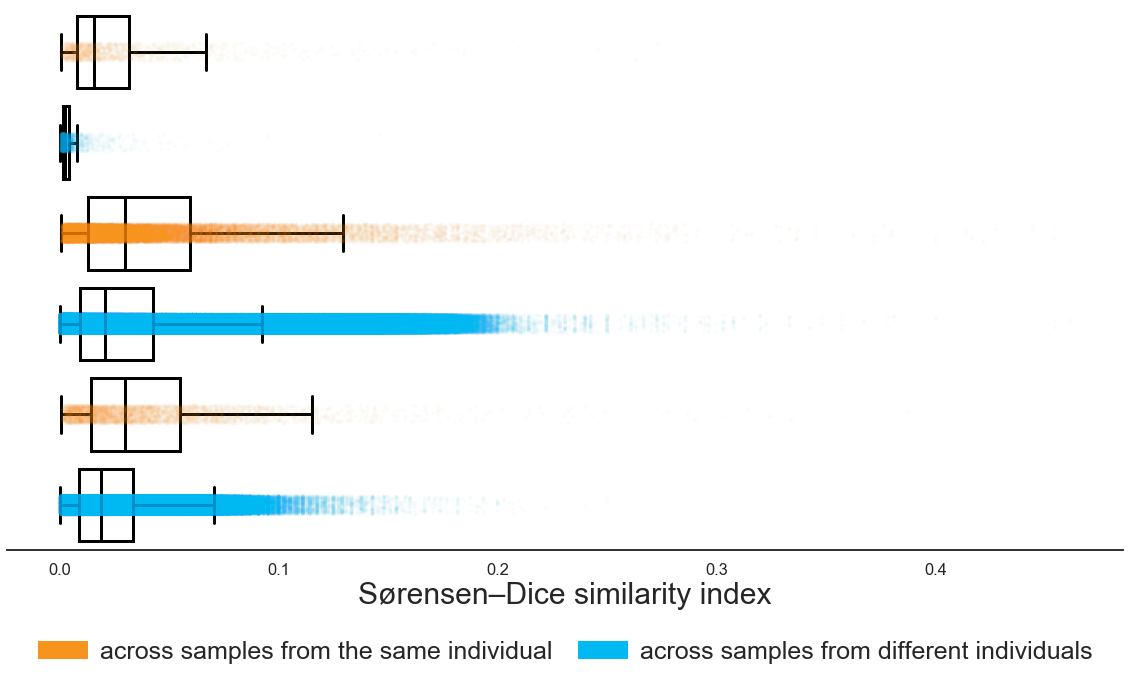

In [19]:
plt.figure(figsize=(20,10))

g=sns.boxplot(y="chain", x="beta_diversity", data = both_df,
              order=['igh_same', 'igh_diff', 'igk_same', 'igk_diff', 'igl_same', 'igl_diff'], 
              saturation=1, fliersize=0, linewidth=3)

for i,box in enumerate(g.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         g.lines[j].set_color('black')

sns.stripplot(y="chain", x="beta_diversity", data = both_df, 
              order=['igh_same', 'igh_diff', 'igk_same', 'igk_diff', 'igl_same', 'igl_diff'],
              size=4, alpha=.025)

plt.xlabel('Sørensen–Dice similarity index')
plt.ylabel('')
#g.set_yticklabels(labels=['IGH same\nindividual', 'IGH different\nindividuals', 'IGK same\nindividual', 
#                          'IGK different\nindividuals', 'IGL same\nindividual', 'IGL different\nindividuals'])
g.set_yticklabels(labels=['', '', '', '', '', ''])
samebar = plt.Rectangle((0,0),1,1,fc="#F7941D", edgecolor = 'none')
diffbar = plt.Rectangle((0,0),1,1,fc='#00b9f2', edgecolor = 'none')
plt.legend([samebar, diffbar], 
           ['across samples from the same individual', 'across samples from different individuals'], 
           bbox_to_anchor=(0.5, -.25, 0, 0.), frameon=False, ncol=2, handletextpad=0.5, columnspacing=1, 
           loc='lower center', prop={'size': 25})
g.xaxis.label.set_size(30)
g.yaxis.label.set_size(30)
sns.despine(top=True, right=True, left=True)
#plt.savefig("../figures/Figure5_a.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure5_a.png", bbox_inches='tight')

In [25]:
medians = both_df.groupby('chain').median()
print(medians)

          beta_diversity
chain                   
igh_diff        0.002483
igh_same        0.015842
igk_diff        0.020833
igk_same        0.029703
igl_diff        0.018797
igl_same        0.029851


In [22]:
igh_mwu = stats.mannwhitneyu(igh_same['beta_diversity'], igh_diff['beta_diversity'], alternative='two-sided')
print(igh_mwu)

MannwhitneyuResult(statistic=4175655.0, pvalue=0.0)


In [23]:
igk_mwu = stats.mannwhitneyu(igk_same['beta_diversity'], igk_diff['beta_diversity'], alternative='two-sided')
print(igk_mwu)

MannwhitneyuResult(statistic=184067549896.0, pvalue=0.0)


In [24]:
igl_mwu = stats.mannwhitneyu(igl_same['beta_diversity'], igl_diff['beta_diversity'], alternative='two-sided')
print(igl_mwu)

MannwhitneyuResult(statistic=4864609217.5, pvalue=5.031723116386584e-261)


In [29]:
means = both_df.groupby('chain').mean()
print(means)

          beta_diversity
chain                   
igh_diff        0.004414
igh_same        0.025581
igk_diff        0.031053
igk_same        0.044516
igl_diff        0.023416
igl_same        0.039409


In [32]:
both_df.groupby("chain").beta_diversity.describe().unstack()

       chain   
count  igh_diff    2.988000e+03
       igh_same    1.542000e+03
       igk_diff    1.021356e+07
       igk_same    3.049800e+04
       igl_diff    1.484735e+06
       igl_same    5.124000e+03
mean   igh_diff    4.413914e-03
       igh_same    2.558142e-02
       igk_diff    3.105318e-02
       igk_same    4.451575e-02
       igl_diff    2.341604e-02
       igl_same    3.940867e-02
std    igh_diff    7.247866e-03
       igh_same    2.886433e-02
       igk_diff    3.048278e-02
       igk_same    4.541076e-02
       igl_diff    1.836084e-02
       igl_same    3.582649e-02
min    igh_diff    3.711264e-04
       igh_same    5.526389e-04
       igk_diff    1.541545e-04
       igk_same    4.183225e-04
       igl_diff    3.511236e-04
       igl_same    5.748778e-04
25%    igh_diff    1.557632e-03
       igh_same    8.017648e-03
       igk_diff    9.132420e-03
       igk_same    1.309091e-02
       igl_diff    9.009009e-03
       igl_same    1.421240e-02
50%    igh_diff    2.482